# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    weather_response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | karratha
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | magan
Processing Record 11 of Set 1 | pascagoula
Processing Record 12 of Set 1 | lujan
Processing Record 13 of Set 1 | avera
Processing Record 14 of Set 1 | sergeyevka
Processing Record 15 of Set 1 | candolim
Processing Record 16 of Set 1 | san andres
Processing Record 17 of Set 1 | viligili
City not found. Skipping...
Processing Record 18 of Set 1 | haldia
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | sitka
Processing Record 22 of

Processing Record 38 of Set 4 | mataura
Processing Record 39 of Set 4 | caravelas
Processing Record 40 of Set 4 | hervey bay
Processing Record 41 of Set 4 | airai
Processing Record 42 of Set 4 | alice springs
Processing Record 43 of Set 4 | sarkand
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | pangnirtung
Processing Record 46 of Set 4 | yerbogachen
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | san carlos de bariloche
Processing Record 49 of Set 4 | barcelos
Processing Record 0 of Set 5 | narsaq
Processing Record 1 of Set 5 | tilichiki
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | sur
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | venezuela
Processing Record 7 of Set 5 | barwaha
City not found. Skipping...
Processing Record 8 of Set 5 | kruisfontein
Processing Record 9 of Set 5 | poum
Processing Record 10 of Set 5 | portpatrick
City not found. S

Processing Record 30 of Set 8 | pimentel
Processing Record 31 of Set 8 | coahuayana
Processing Record 32 of Set 8 | buchanan
Processing Record 33 of Set 8 | mnogovershinnyy
Processing Record 34 of Set 8 | maumere
Processing Record 35 of Set 8 | baiyin
Processing Record 36 of Set 8 | mangai
Processing Record 37 of Set 8 | husavik
Processing Record 38 of Set 8 | kaitangata
Processing Record 39 of Set 8 | bella vista
Processing Record 40 of Set 8 | novopokrovka
Processing Record 41 of Set 8 | paita
Processing Record 42 of Set 8 | weligama
Processing Record 43 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 44 of Set 8 | bourail
Processing Record 45 of Set 8 | derzhavinsk
Processing Record 46 of Set 8 | naliya
Processing Record 47 of Set 8 | asyut
Processing Record 48 of Set 8 | gordeyevka
Processing Record 49 of Set 8 | north bend
Processing Record 0 of Set 9 | benguela
Processing Record 1 of Set 9 | lagoa
Processing Record 2 of Set 9 | belaya gora
Processing Record 3 

Processing Record 16 of Set 12 | okha
Processing Record 17 of Set 12 | sokone
Processing Record 18 of Set 12 | kresttsy
Processing Record 19 of Set 12 | boke
Processing Record 20 of Set 12 | marawi
Processing Record 21 of Set 12 | nizhniy kuranakh
Processing Record 22 of Set 12 | victor harbor
Processing Record 23 of Set 12 | makung
City not found. Skipping...
Processing Record 24 of Set 12 | kirando
Processing Record 25 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 26 of Set 12 | olinda
Processing Record 27 of Set 12 | bianzhuang
Processing Record 28 of Set 12 | paciran
Processing Record 29 of Set 12 | conakry
Processing Record 30 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 31 of Set 12 | mmathubudukwane
Processing Record 32 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 33 of Set 12 | itacare
Processing Record 34 of Set 12 | monteagudo
Processing Record 35 of Set 12 | hanzhong
Processing Record 36 of Set 12 | viti

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,clyde river,70.4692,-68.5914,-31.87,75,0,1.54,CA,1679126442
1,karratha,-20.7377,116.8463,35.98,36,2,5.45,AU,1679126319
2,klaksvik,62.2266,-6.5890,2.51,59,100,9.34,FO,1679126443
3,hithadhoo,-0.6000,73.0833,27.85,70,100,0.98,MV,1679126443
4,avarua,-21.2078,-159.7750,26.03,89,100,2.57,CK,1679126276


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [178]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,clyde river,70.4692,-68.5914,-31.87,75,0,1.54,CA,1679126442
1,karratha,-20.7377,116.8463,35.98,36,2,5.45,AU,1679126319
2,klaksvik,62.2266,-6.5890,2.51,59,100,9.34,FO,1679126443
3,hithadhoo,-0.6000,73.0833,27.85,70,100,0.98,MV,1679126443
4,avarua,-21.2078,-159.7750,26.03,89,100,2.57,CK,1679126276


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

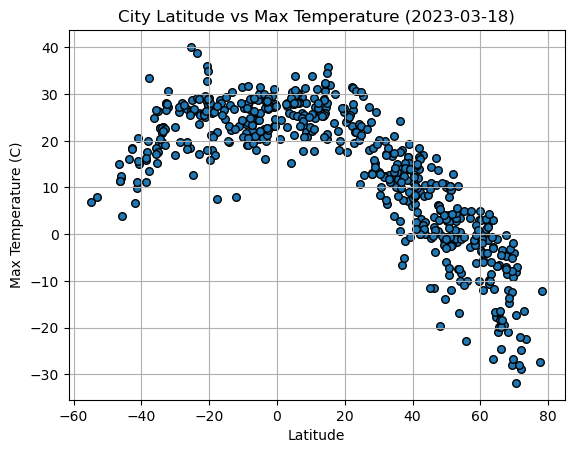

In [179]:
# Build scatter plot for latitude vs. temperature
ax1 = city_data_df.plot.scatter(x="Lat", y="Max Temp", grid = True, s=30, edgecolors='black')

# Incorporate the other graph properties
ax1.set_title("City Latitude vs Max Temperature (2023-03-18)")
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

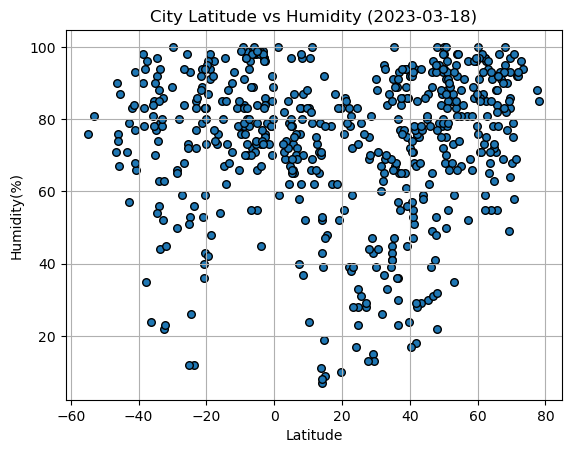

In [180]:
# Build the scatter plots for latitude vs. humidity
ax2 = city_data_df.plot.scatter(x="Lat", y="Humidity", grid = True, s=30, edgecolors='black')

# Incorporate the other graph properties
ax2.set_title("City Latitude vs Humidity (2023-03-18)")
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity(%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

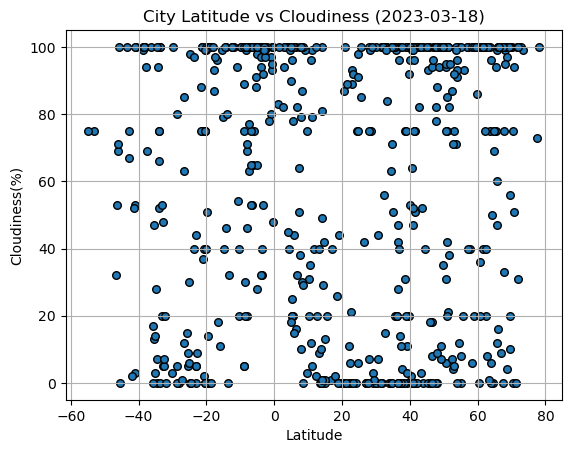

In [181]:
# Build the scatter plots for latitude vs. cloudiness
ax3 = city_data_df.plot.scatter(x="Lat", y="Cloudiness", grid = True, s=30, edgecolors='black')

# Incorporate the other graph properties
ax3.set_title("City Latitude vs Cloudiness (2023-03-18)")
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness(%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

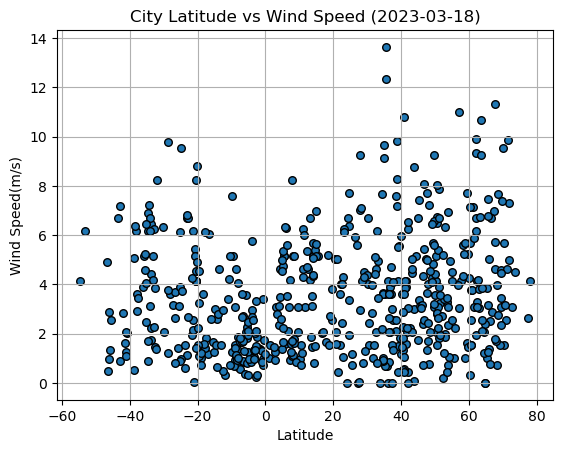

In [182]:
# Build the scatter plots for latitude vs. wind speed
ax4 = city_data_df.plot.scatter(x="Lat", y="Wind Speed", grid = True, s=30, edgecolors='black')

# Incorporate the other graph properties
ax4.set_title("City Latitude vs Wind Speed (2023-03-18)")
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed(m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [183]:
# Define a function to create Linear Regression plots
def show_linegress(x_label, x_value, y_label, y_value):
    slope, intercept, r, p, std_err = linregress(x_value, y_value)
    trend = slope * x_value + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value,trend,"-", color="r")
    xmin, xmax, ymin, ymax = plt.axis()
    an_x = xmin + (xmax-xmin)/10
    an_y = ymin + (ymax-ymin)/10
    plt.annotate(line_eq,(an_x, an_y),fontsize=13,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {r}")

In [184]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,clyde river,70.4692,-68.5914,-31.87,75,0,1.54,CA,1679126442
2,klaksvik,62.2266,-6.5890,2.51,59,100,9.34,FO,1679126443
5,yellowknife,62.4560,-114.3525,-10.71,85,20,4.12,CA,1679126445
7,kapaa,22.0752,-159.3190,23.18,83,0,1.54,US,1679126074
8,magan,39.9683,-3.9310,11.29,72,53,5.98,ES,1679126446


In [185]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,karratha,-20.7377,116.8463,35.98,36,2,5.45,AU,1679126319
3,hithadhoo,-0.6000,73.0833,27.85,70,100,0.98,MV,1679126443
4,avarua,-21.2078,-159.7750,26.03,89,100,2.57,CK,1679126276
6,cidreira,-30.1811,-50.2056,23.05,89,3,6.33,BR,1679126232
10,lujan,-34.5703,-59.1050,22.79,92,0,0.89,AR,1679126403


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8898518590378355


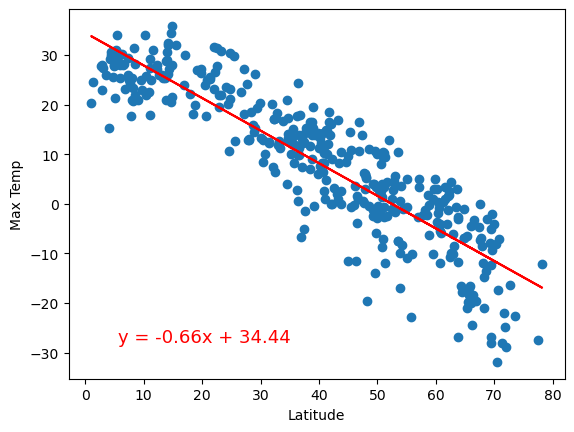

In [186]:
# Linear regression on Northern Hemisphere
show_linegress("Latitude", northern_hemi_df["Lat"], "Max Temp", northern_hemi_df["Max Temp"])

The r-value is: 0.46772957454656383


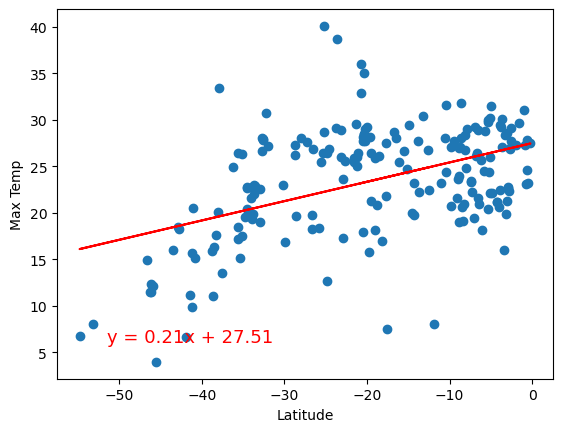

In [187]:
# Linear regression on Southern Hemisphere
show_linegress("Latitude", southern_hemi_df["Lat"], "Max Temp", southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** As per the plot above, we can see temperature is very low near the poles (lat>70 and lat<-70). If we move towards equador, tempertare is incresing alsmost lineraly. Temperature is maximam around equador.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.30222296530760445


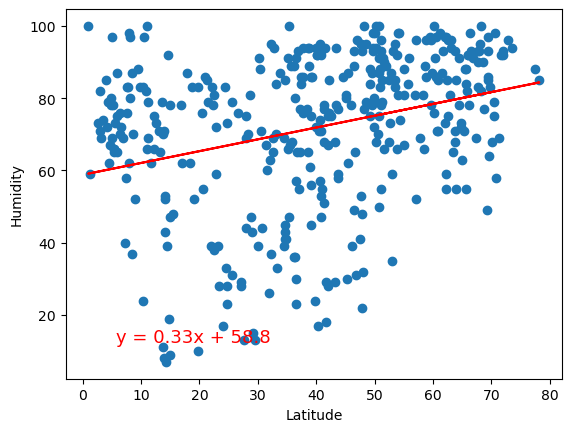

In [188]:
# Northern Hemisphere
show_linegress("Latitude", northern_hemi_df["Lat"], "Humidity", northern_hemi_df["Humidity"])

The r-value is: 0.2156383907174791


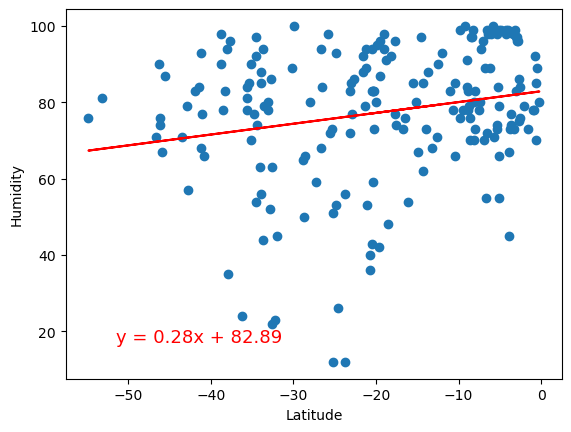

In [189]:
# Southern Hemisphere
show_linegress("Latitude", southern_hemi_df["Lat"], "Humidity", southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** From the above plots we can see humidity is less in south pole region and its increasing slightly as we move towards north. The rate of increase in very less though.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18890939517455124


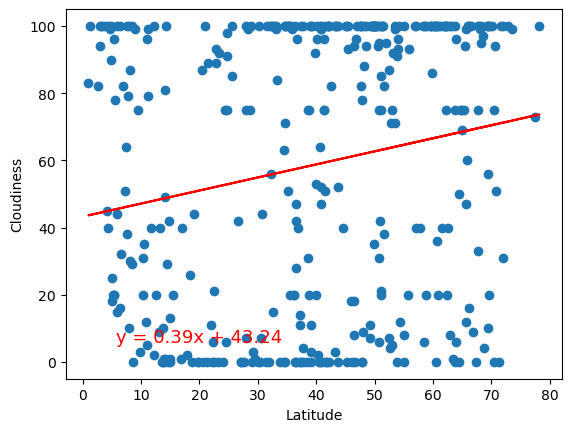

In [190]:
# Northern Hemisphere
show_linegress("Latitude", northern_hemi_df["Lat"], "Cloudiness", northern_hemi_df["Cloudiness"])

The r-value is: 0.30428535164156506


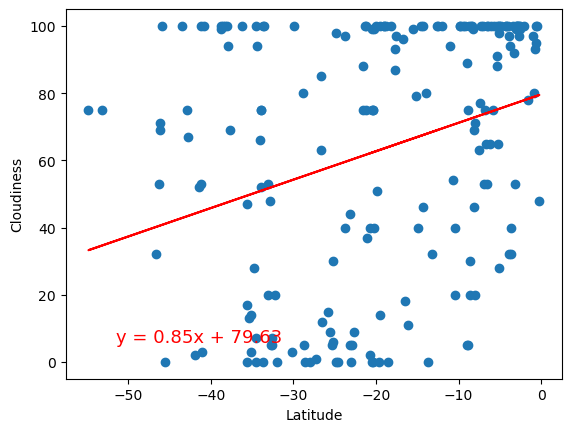

In [191]:
# Southern Hemisphere
show_linegress("Latitude", southern_hemi_df["Lat"], "Cloudiness", southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** From the above plot we can see, there are couldiness in north than south hahf. It is very less coudy in south poll, and its going more as we are moving towards north. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1259567643897171


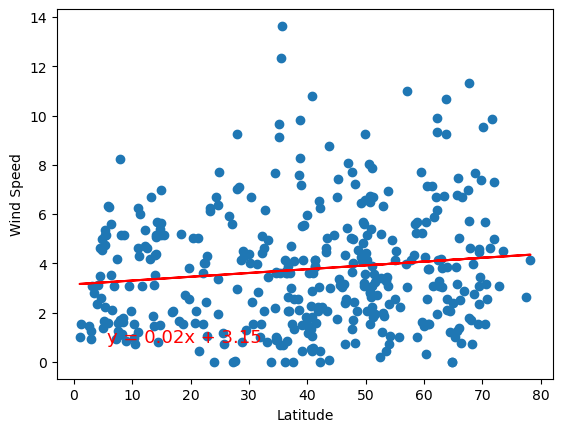

In [192]:
# Northern Hemisphere
show_linegress("Latitude", northern_hemi_df["Lat"], "Wind Speed", northern_hemi_df["Wind Speed"])

The r-value is: -0.37656127009818297


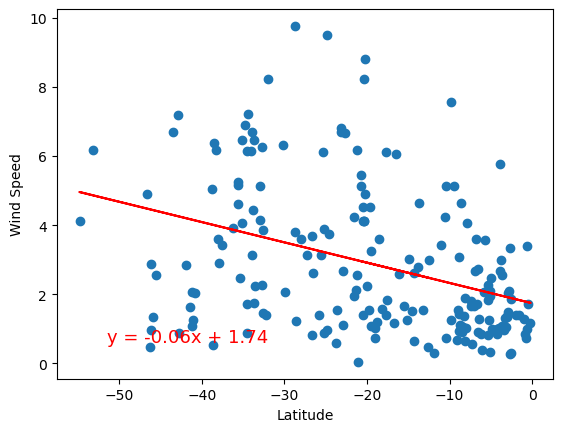

In [193]:
# Southern Hemisphere
show_linegress("Latitude", southern_hemi_df["Lat"], "Wind Speed", southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** From the above plots we can see, wind speed is high near the south pole. Its lineraly decreasing as we move towards the euqdor. Windspeed in north is almost same over the latitude.